<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/KFold_CrossValidation_and_Evaluation_for_Classification_Using_ScikitLearn_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load built-in iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
# Train-test split for hold-out evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X, y, cv=cv)

In [11]:
# Predictions on test set
y_pred = model.predict(X_test)

# Prints
print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))
print("Cross-Validation Std Deviation:", np.std(cv_scores))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Cross-Validation Mean Accuracy: 0.9733333333333334
Cross-Validation Std Deviation: 0.02494438257849294
Test Set Accuracy: 1.0


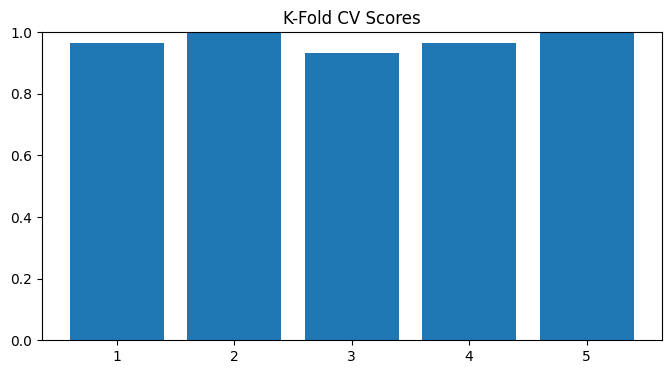

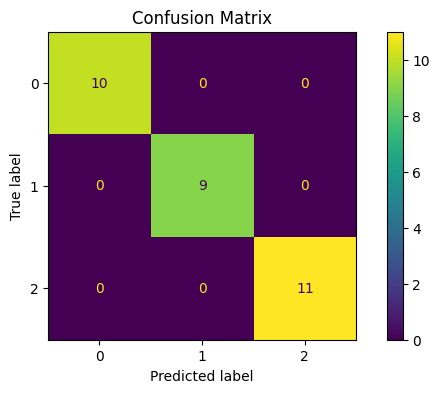

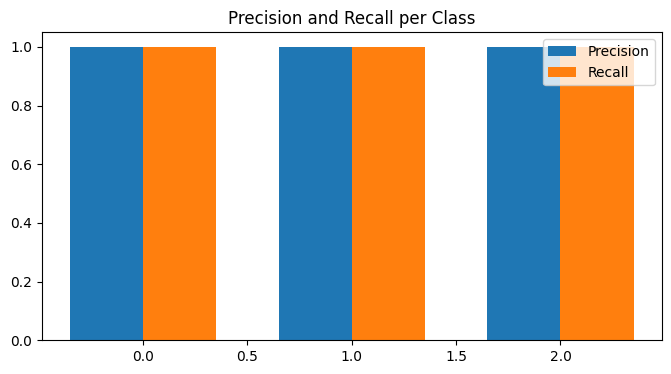

In [12]:
# Visual 1: Cross-Validation Scores Bar Plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title('K-Fold CV Scores')
plt.ylim(0, 1)
plt.show()

# Visual 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 4))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Visual 3: Precision-Recall per Class (Bar)
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 4))
width = 0.35
ind = np.arange(3)
plt.bar(ind - width/2, prec, width, label='Precision')
plt.bar(ind + width/2, rec, width, label='Recall')
plt.title('Precision and Recall per Class')
plt.legend()
plt.show()